In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/drive/MyDrive/data_science/EDA-20250310T173139Z-001/EDA/BIKE DETAILS.csv')

In [4]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [5]:
df.shape

(1061, 7)

In [7]:
df.describe(include='all')

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
count,1061,1061.000000,1061.000000,1061,1061,1061.000000,6.260000e+02
unique,279,NaN,NaN,2,4,NaN,NaN
top,Bajaj Pulsar 150,NaN,NaN,Individual,1st owner,NaN,NaN
freq,41,NaN,NaN,1055,924,NaN,NaN
mean,NaN,59638.151744,2013.867107,NaN,NaN,34359.833176,8.795871e+04
std,NaN,56304.291973,4.301191,NaN,NaN,51623.152702,7.749659e+04
min,NaN,5000.000000,1988.000000,NaN,NaN,350.000000,3.049000e+04
25%,NaN,28000.000000,2011.000000,NaN,NaN,13500.000000,5.485200e+04
50%,NaN,45000.000000,2015.000000,NaN,NaN,25000.000000,7.275250e+04
75%,NaN,70000.000000,2017.000000,NaN,NaN,43000.000000,8.703150e+04


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [9]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


What is the range of selling prices in the dataset.

In [10]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [13]:
max_price = df['selling_price'].max()
min_price = df['selling_price'].min()
print(f"The range of selling prices is from {min_price} to {max_price}.")

The range of selling prices is from 5000 to 760000.


What is the median selling price for bikes in the dataset?

In [14]:
medain = df['selling_price'].median()
print(f"The median selling price for bikes in the dataset is {medain}.")

The median selling price for bikes in the dataset is 45000.0.


 What is the most common seller type?

In [15]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

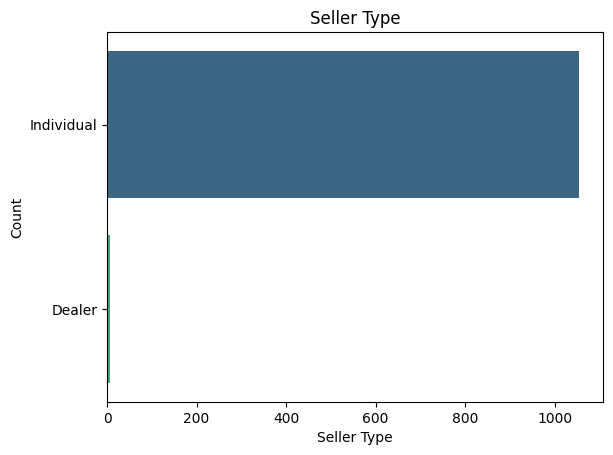

In [18]:
sns.countplot(df['seller_type'], palette='viridis')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.title('Seller Type')
plt.show()

How many bikes have driven more than 50,000 kilometers?

In [21]:
bike = df.loc[df['km_driven'] > 50000]
print(f"There are {len(bike)} bikes that have driven more than 50,000 kilometers.")

There are 170 bikes that have driven more than 50,000 kilometers.


In [22]:
bike_1 =df[df['km_driven']>50000].shape[0]
print("Number of bikes driven more than 50,000 kilometers:", bike_1)

Number of bikes driven more than 50,000 kilometers: 170


What is the average km_driven value for each ownership type?

In [23]:
df.columns


Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [27]:
ownership_types = df.groupby('owner')['km_driven'].mean()
print(ownership_types)
ownership_types

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


What proportion of bikes are from the year 2015 or older

In [28]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [29]:
total_bike = df.shape[0]
bike_2015 = df[df['year'] >= 2015].shape[0]
proportion = bike_2015 / total_bike

In [30]:
proportion

0.527803958529689

What is the trend of missing values across the dataset?

In [31]:
missing_values = df.isnull().sum()
missing_presentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Missing Presentage': missing_presentage})
missing_df

,Missing Values,Missing Presentage
name,0,0.000000
selling_price,0,0.000000
year,0,0.000000
seller_type,0,0.000000
owner,0,0.000000
km_driven,0,0.000000
ex_showroom_price,435,40.999057


What is the highest ex_showroom_price recorded, and for which bike?

In [32]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [33]:
max_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_max_price = df.loc[df['ex_showroom_price'] == max_ex_showroom_price]
print(f"The highest ex_showroom_price recorded is {max_ex_showroom_price}.")
print(f"The bike with the highest ex_showroom_price is {bike_with_max_price}.")

The highest ex_showroom_price recorded is 1278000.0.
The bike with the highest ex_showroom_price is                            name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0  .


In [36]:
max_price = df.loc[df['ex_showroom_price'].idxmax(),['name', 'ex_showroom_price']]

In [37]:
max_price

,134
name,Harley-Davidson Street Bob
ex_showroom_price,1278000.0


What is the total number of bikes listed by each seller type?

In [38]:
bike_2 = df.groupby('seller_type')['name'].count()
bike_2

,name
seller_type,
Dealer,6
Individual,1055


In [39]:
# Count the number of bikes for each seller type
bikes_per_seller = df['seller_type'].value_counts()

print("Total number of bikes listed by each seller type:\n", bikes_per_seller)


Total number of bikes listed by each seller type:
 seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


What is the relationship between selling_price and km_driven for first-owner bikes?

In [48]:
first_owner_bike = df[df['selling_price']=='1st owner']
corr=first_owner_bike['selling_price'].corr(first_owner_bike['km_driven'])
corr

nan

In [45]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

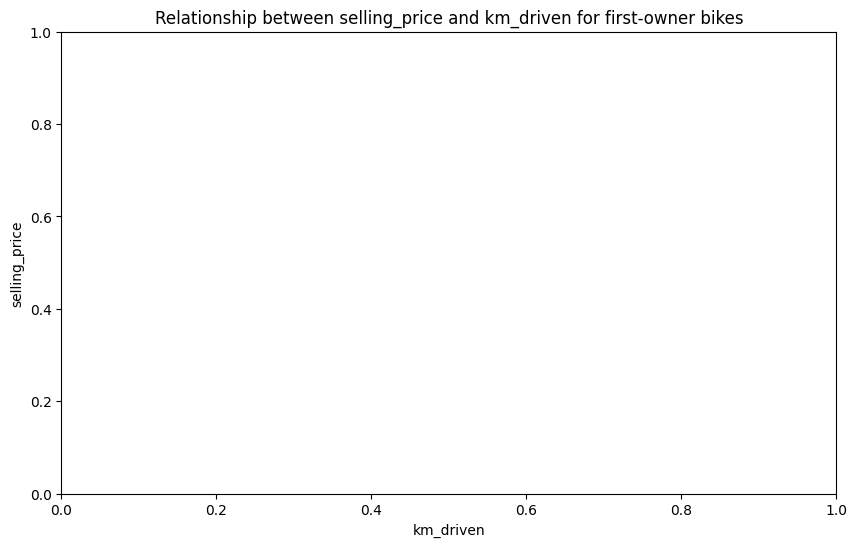

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=first_owner_bike['km_driven'], y=first_owner_bike['selling_price'], data=first_owner_bike)
plt.title('Relationship between selling_price and km_driven for first-owner bikes')
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.show()

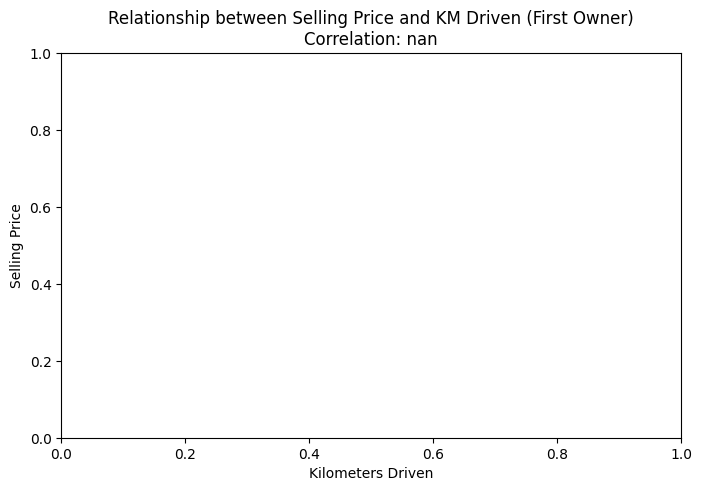

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for first-owner bikes
first_owner_bikes = df[df['owner'] == 'First Owner']

# Calculate correlation
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=first_owner_bikes['km_driven'], y=first_owner_bikes['selling_price'], alpha=0.5)
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.title(f"Relationship between Selling Price and KM Driven (First Owner)\nCorrelation: {correlation:.2f}")
plt.show()


Identify and remove outliers in the km_driven column using the IQR method?

In [53]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [54]:
# Identify outliers
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]

print("Number of outliers in km_driven:", outliers.shape[0])

# Remove outliers
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("Dataset size after removing outliers:", df_cleaned.shape)

Number of outliers in km_driven: 39
Dataset size after removing outliers: (1022, 7)


 Perform a bivariate analysis to visualize the relationship between year and selling_price

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


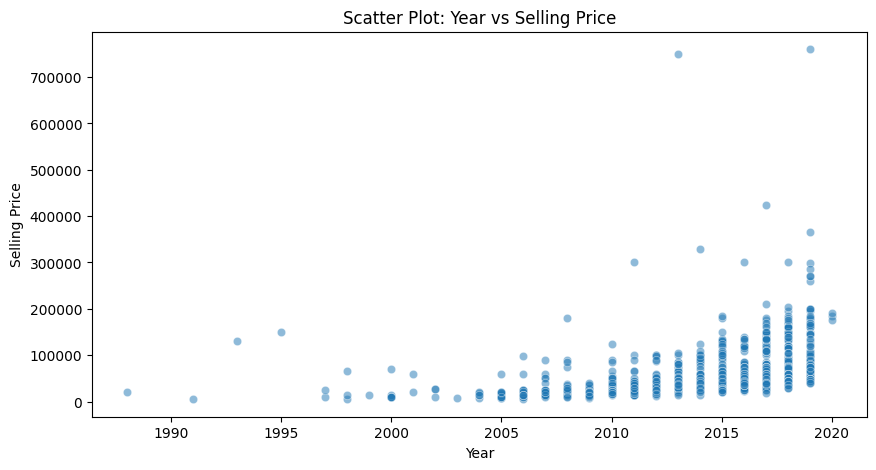

In [56]:
# Scatter plot to show the trend
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['year'], y=df['selling_price'], alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Scatter Plot: Year vs Selling Price")
plt.show()

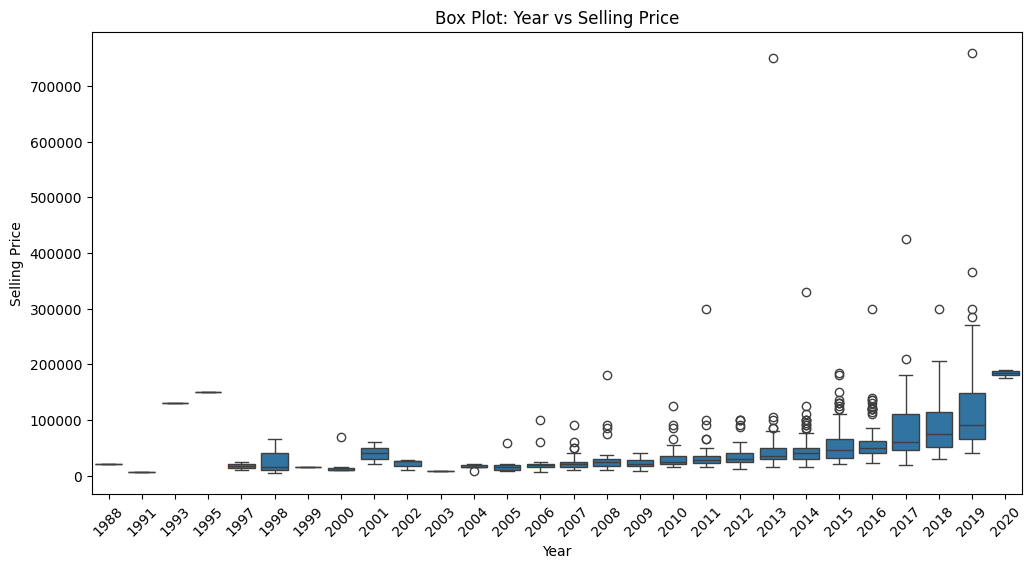

In [57]:
# Box plot to analyze price distribution by year
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['year'], y=df['selling_price'])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Box Plot: Year vs Selling Price")
plt.show()

What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)

In [63]:
current_year = 2025
df['age'] = current_year - df['year']


In [64]:
average_depreciation = df.groupby('year')['selling_price'].mean()
average_depreciation.head(5)

,selling_price
year,
1988,20000.0
1991,6000.0
1993,130000.0
1995,150000.0
1997,17500.0


Which bike names are priced significantly above the average price for their manufacturing year

In [65]:
# Calculate the average selling price for each manufacturing year
yearly_avg_price = df.groupby('year')['selling_price'].mean()

# Merge with the original dataset to compare each bike's price with the average of its year
df['avg_price_for_year'] = df['year'].map(yearly_avg_price)

# Define a threshold (e.g., 1.5 times the average price)
threshold_factor = 1.5
df_high_priced = df[df['selling_price'] > df['avg_price_for_year'] * threshold_factor]

# Select relevant columns
high_priced_bikes = df_high_priced[['name', 'year', 'selling_price', 'avg_price_for_year']]

print("Bikes priced significantly above the average price for their manufacturing year:\n", high_priced_bikes)

Bikes priced significantly above the average price for their manufacturing year:
                                      name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     avg_price_for_year  
2          87660.374046  
7          34289.285714  
13        119689.511628  
18         87660.3740

Develop a correlation matrix for numeric columns and visualize it using a heatmap.

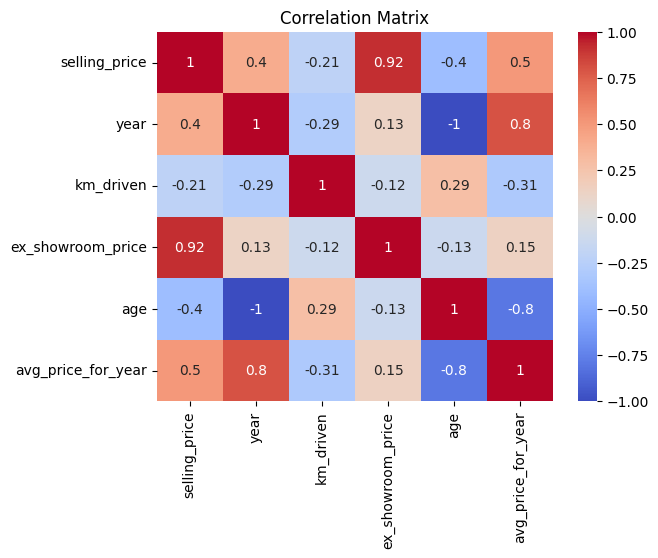

In [67]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()